In [1]:
# important first import pandas
import pandas as pd
import numpy as np


In [3]:
# To connect with daba base
from sqlalchemy import create_engine

In [4]:
sqlitedb_path = '../data/raw/emiliopatio.db'
engine = create_engine(f'sqlite:///{sqlitedb_path}')

In [5]:
pd.set_option('display.max_rows', 13)
pd.set_option('display.max_columns', 13)

In [6]:
# list all tables in database

pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'", engine)

,type,name,tbl_name,rootpage,sql
0,table,rank_info,rank_info,2,CREATE TABLE rank_info (\n\tid BIGINT NOT NULL...
1,table,personal_info,personal_info,34,CREATE TABLE personal_info (\n\tid BIGINT NOT ...
2,table,business_info,business_info,155,CREATE TABLE business_info (\n\tid BIGINT NOT ...


In [7]:
business = pd.read_sql_query("SELECT * FROM business_info", engine)
business

,id,Unnamed: 0,Source,worth,worthChange,realTimeWorth,realTimePosition
0,2813,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,None,1
1,8910,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,None,2
2,3919,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,None,3
3,6449,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,None,4
4,5032,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,None,5
...,...,...,...,...,...,...,...
2203,2065,2255,"Fashion & Retail ==> fashion, entertainment",1.0 BUSD,0.0 millions USD,None,2134
2204,2207,2256,Manufacturing ==> electrical equipment,1.0 BUSD,nan millions USD,None,2134
2205,3442,2257,Manufacturing ==> electrical equipment,1.0 BUSD,0.0 millions USD,None,1856
2206,8144,2258,Manufacturing ==> printed circuit boards,1.0 BUSD,0.0 millions USD,None,1978


In [8]:
business.dtypes

id                   int64
Unnamed: 0           int64
Source              object
worth               object
worthChange         object
realTimeWorth       object
realTimePosition     int64
dtype: object

In [49]:
personal = pd.read_sql_query("SELECT * FROM personal_info", engine)
personal.head(20)

,id,lastName,age,Unnamed: 0,gender,country,image
0,2813,beZOs,54 years old,52,M,None,https://specials-images.forbesimg.com/imageser...
1,8910,gaTES,62 years old,53,M,USA,https://specials-images.forbesimg.com/imageser...
2,3919,BUFFETT,87 years old,54,M,United States,https://specials-images.forbesimg.com/imageser...
3,6449,arnAUlt,69 years old,55,M,France,https://specials-images.forbesimg.com/imageser...
4,5032,zUCKERBerg,1985,56,None,None,https://specials-images.forbesimg.com/imageser...
...,...,...,...,...,...,...,...
15,9703,walTON,68 years old,67,None,United States,https://specials-images.forbesimg.com/imageser...
16,8608,MA,46 years old,68,M,China,https://specials-images.forbesimg.com/imageser...
17,6364,betteNCOURT MEYErs,64 years old,69,F,None,https://specials-images.forbesimg.com/imageser...
18,5930,aMBANI,61 years old,70,None,None,https://specials-images.forbesimg.com/imageser...


In [10]:
personal.dtypes

id             int64
lastName      object
age           object
Unnamed: 0     int64
gender        object
country       object
image         object
dtype: object

In [11]:
rank = pd.read_sql_query("SELECT * FROM rank_info", engine)
rank.head(55)

,id,name,position,Unnamed: 0
0,4466,anant asavABHOKHIN & family,NaN,0
1,7191,arash FERdowsi,NaN,1
2,9002,bantHOON LAMSAM & FAMIly,NaN,2
3,2649,bill adderlEY & family,NaN,3
4,3917,boRIS ZINGAREVICh,NaN,4
...,...,...,...,...
50,4468,zhang zHONGNENG & Family,NaN,50
51,2013,zhu YICAI,NaN,51
52,2813,jeff BEzos,1.0,52
53,8910,bilL GAtes,2.0,53


In [12]:
rank.dtypes

id              int64
name           object
position      float64
Unnamed: 0      int64
dtype: object

In [13]:
rank.isnull().sum()

id             0
name           0
position      52
Unnamed: 0     0
dtype: int64

In [14]:
# data cleaning to rank


rank.isnull().sum()

id             0
name           0
position      52
Unnamed: 0     0
dtype: int64

In [15]:
personal.isnull().sum()

id             0
lastName       0
age           65
Unnamed: 0     0
gender        13
country        0
image          0
dtype: int64

In [16]:
rank.isnull().sum() > 0

id            False
name          False
position       True
Unnamed: 0    False
dtype: bool

In [17]:
business.isnull().sum()

id                     0
Unnamed: 0             0
Source                 0
worth                  0
worthChange            0
realTimeWorth       2208
realTimePosition       0
dtype: int64

In [18]:
null_cols_rank = rank.isnull().sum()

null_cols_rank[null_cols_rank > 0]

position    52
dtype: int64

In [19]:
null_cols_rank[null_cols_rank > 0] / len(rank) * 100


position    2.300885
dtype: float64

In [20]:
!pip install missingno

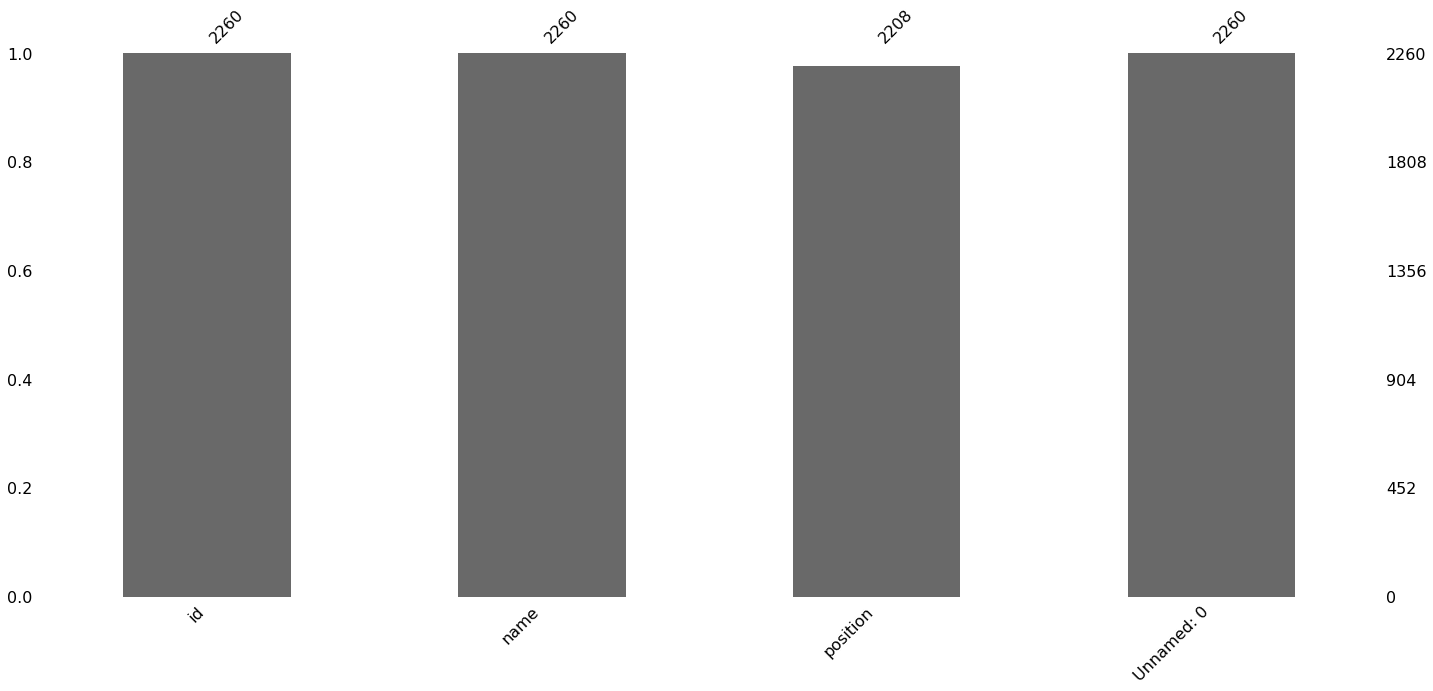

In [21]:
import missingno

%matplotlib inline

# it is necessary to sample data since otherwise the plot would be over-populated 
# .sample coge una muestra tipo random de los datos pero para el ejemplo 
data = rank.sample(2260, random_state=42)
missingno.bar(data);

In [22]:
len(rank.columns)

4

In [23]:
# drop unnamed:0

rank_drop_unnamed = rank.drop('Unnamed: 0', axis = 1)
rank_drop_unnamed

,id,name,position
0,4466,anant asavABHOKHIN & family,NaN
1,7191,arash FERdowsi,NaN
2,9002,bantHOON LAMSAM & FAMIly,NaN
3,2649,bill adderlEY & family,NaN
4,3917,boRIS ZINGAREVICh,NaN
...,...,...,...
2255,2065,zhao xiAOQIANG,2204.0
2256,2207,zhou liANGZHANg,2205.0
2257,3442,zhu XINGMINg,2206.0
2258,8144,zhUO Jun,2207.0


In [24]:
rank.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2260.0,5450.300885,2618.611942,1003.0,3157.75,5387.0,7790.25,9995.0
position,2208.0,1104.500000,637.539018,1.0,552.75,1104.5,1656.25,2208.0
Unnamed: 0,2260.0,1129.500000,652.550126,0.0,564.75,1129.5,1694.25,2259.0


In [25]:
rank.shape

(2260, 4)

In [26]:
rank = rank.dropna()

In [27]:
rank.shape

(2208, 4)

In [28]:
personal.shape

(2208, 7)

In [29]:
business.shape

(2208, 7)

In [30]:
rank['id']

52      2813
53      8910
54      3919
55      6449
56      5032
        ... 
2255    2065
2256    2207
2257    3442
2258    8144
2259    9807
Name: id, Length: 2208, dtype: int64

In [31]:
personal.shape


(2208, 7)

In [32]:
personal['id']

0       2813
1       8910
2       3919
3       6449
4       5032
        ... 
2203    2065
2204    2207
2205    3442
2206    8144
2207    9807
Name: id, Length: 2208, dtype: int64

In [33]:
business.shape

(2208, 7)

In [34]:
df_merge_personal_and_business = pd.merge(personal, business, on='id')
df_merge_personal_and_business

,id,lastName,age,Unnamed: 0_x,gender,country,image,Unnamed: 0_y,Source,worth,worthChange,realTimeWorth,realTimePosition
0,2813,beZOs,54 years old,52,M,None,https://specials-images.forbesimg.com/imageser...,52,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,None,1
1,8910,gaTES,62 years old,53,M,USA,https://specials-images.forbesimg.com/imageser...,53,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,None,2
2,3919,BUFFETT,87 years old,54,M,United States,https://specials-images.forbesimg.com/imageser...,54,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,None,3
3,6449,arnAUlt,69 years old,55,M,France,https://specials-images.forbesimg.com/imageser...,55,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,None,4
4,5032,zUCKERBerg,1985,56,None,None,https://specials-images.forbesimg.com/imageser...,56,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,None,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2065,zHAO,51 years old,2255,None,None,https://specials-images.forbesimg.com/imageser...,2255,"Fashion & Retail ==> fashion, entertainment",1.0 BUSD,0.0 millions USD,None,2134
2204,2207,zhOU,55 years old,2256,Male,None,https://specials-images.forbesimg.com/imageser...,2256,Manufacturing ==> electrical equipment,1.0 BUSD,nan millions USD,None,2134
2205,3442,zHU,51 years old,2257,M,None,https://specials-images.forbesimg.com/imageser...,2257,Manufacturing ==> electrical equipment,1.0 BUSD,0.0 millions USD,None,1856
2206,8144,ZHUO,52 years old,2258,F,Hong Kong,https://specials-images.forbesimg.com/imageser...,2258,Manufacturing ==> printed circuit boards,1.0 BUSD,0.0 millions USD,None,1978


In [35]:
df_all = pd.merge(df_merge_personal_and_business, rank, on='id')
df_all

,id,lastName,age,Unnamed: 0_x,gender,country,...,worthChange,realTimeWorth,realTimePosition,name,position,Unnamed: 0
0,2813,beZOs,54 years old,52,M,None,...,0.0 millions USD,None,1,jeff BEzos,1.0,52
1,8910,gaTES,62 years old,53,M,USA,...,-0.001 millions USD,None,2,bilL GAtes,2.0,53
2,3919,BUFFETT,87 years old,54,M,United States,...,-0.002 millions USD,None,3,warREN BUFfett,3.0,54
3,6449,arnAUlt,69 years old,55,M,France,...,0.0 millions USD,None,4,bernaRD ARNault,4.0,55
4,5032,zUCKERBerg,1985,56,None,None,...,0.0 millions USD,None,5,MARK ZUCKERBErg,5.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2065,zHAO,51 years old,2255,None,None,...,0.0 millions USD,None,2134,zhao xiAOQIANG,2204.0,2255
2204,2207,zhOU,55 years old,2256,Male,None,...,nan millions USD,None,2134,zhou liANGZHANg,2205.0,2256
2205,3442,zHU,51 years old,2257,M,None,...,0.0 millions USD,None,1856,zhu XINGMINg,2206.0,2257
2206,8144,ZHUO,52 years old,2258,F,Hong Kong,...,0.0 millions USD,None,1978,zhUO Jun,2207.0,2258


In [36]:
df_all.columns


Index(['id', 'lastName', 'age', 'Unnamed: 0_x', 'gender', 'country', 'image',
       'Unnamed: 0_y', 'Source', 'worth', 'worthChange', 'realTimeWorth',
       'realTimePosition', 'name', 'position', 'Unnamed: 0'],
      dtype='object')

In [37]:
# This not es valid
df_all.columns = df_all.columns.str.lower()
type(df_all)


pandas.core.frame.DataFrame

In [38]:
all_columns = list(df_all.columns)
all_columns


['id',
 'lastname',
 'age',
 'unnamed: 0_x',
 'gender',
 'country',
 'image',
 'unnamed: 0_y',
 'source',
 'worth',
 'worthchange',
 'realtimeworth',
 'realtimeposition',
 'name',
 'position',
 'unnamed: 0']

In [39]:
df_all.rename(index={e: e+1 for e in range(len(df_all))}, 
                columns={'lastName': 'lastname',
                         'Source': 'source',
                        'worthChange':'worthchange',
                        'realTimeWorth':'realtimeworth',
                        'realTimePosition':'realtimeposition'}, 
                inplace=True)
df_all

,id,lastname,age,unnamed: 0_x,gender,country,...,worthchange,realtimeworth,realtimeposition,name,position,unnamed: 0
1,2813,beZOs,54 years old,52,M,None,...,0.0 millions USD,None,1,jeff BEzos,1.0,52
2,8910,gaTES,62 years old,53,M,USA,...,-0.001 millions USD,None,2,bilL GAtes,2.0,53
3,3919,BUFFETT,87 years old,54,M,United States,...,-0.002 millions USD,None,3,warREN BUFfett,3.0,54
4,6449,arnAUlt,69 years old,55,M,France,...,0.0 millions USD,None,4,bernaRD ARNault,4.0,55
5,5032,zUCKERBerg,1985,56,None,None,...,0.0 millions USD,None,5,MARK ZUCKERBErg,5.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2065,zHAO,51 years old,2255,None,None,...,0.0 millions USD,None,2134,zhao xiAOQIANG,2204.0,2255
2205,2207,zhOU,55 years old,2256,Male,None,...,nan millions USD,None,2134,zhou liANGZHANg,2205.0,2256
2206,3442,zHU,51 years old,2257,M,None,...,0.0 millions USD,None,1856,zhu XINGMINg,2206.0,2257
2207,8144,ZHUO,52 years old,2258,F,Hong Kong,...,0.0 millions USD,None,1978,zhUO Jun,2207.0,2258


In [40]:
df_all.loc[45:55, 'age':'position']
    


,age,unnamed: 0_x,gender,country,image,unnamed: 0_y,source,worth,worthchange,realtimeworth,realtimeposition,name,position
45,83 years old,96,M,Italy,https://specials-images.forbesimg.com/imageser...,96,Fashion & Retail ==> eyeglasses,21.2 BUSD,0.006 millions USD,None,39,leonardo DEL VECChio,45.0
46,78 years old,97,M,None,https://specials-images.forbesimg.com/imageser...,97,Fashion & Retail ==> retail,20.9 BUSD,0.0 millions USD,None,79,dietER SCHWarz,46.0
47,73 years old,98,Male,None,https://specials-images.forbesimg.com/imageser...,98,Finance and Investments ==> discount brokerage,20.3 BUSD,0.0 millions USD,None,41,thOMAS PETERFFy,47.0
48,67 years old,99,M,None,https://specials-images.forbesimg.com/imageser...,99,"Fashion & Retail ==> Aldi, Trader Joe's",20.2 BUSD,0.0 millions USD,None,54,"theo alBRECHT, JR.",48.0
49,61 years old,100,M,None,https://specials-images.forbesimg.com/imageser...,100,Diversified ==> diversified,20.2 BUSD,-0.001 millions USD,None,44,len BLAVATNIK,49.0
50,75 years old,101,M,None,https://specials-images.forbesimg.com/imageser...,101,Manufacturing ==> home appliances,20.1 BUSD,0.001 millions USD,None,47,he xiaNGJIAn,50.0
51,89 years old,102,M,None,https://specials-images.forbesimg.com/imageser...,102,Gambling & Casinos ==> casinos,20.1 BUSD,0.0 millions USD,None,46,luI CHE WOo,51.0
52,80 years old,103,M,United States,https://specials-images.forbesimg.com/imageser...,103,Finance and Investments ==> hedge funds,20.0 BUSD,0.0 millions USD,None,50,james SIMONs,52.0
53,93 years old,104,None,None,https://specials-images.forbesimg.com/imageser...,104,Diversified ==> diversified,20.0 BUSD,0.0 millions USD,None,67,heNRY Sy,53.0
54,46 years old,105,M,None,https://specials-images.forbesimg.com/imageser...,105,Automotive ==> Tesla Motors,19.9 BUSD,0.0 millions USD,None,45,elon MUSK,54.0


In [41]:
df_all._get_numeric_data()

,id,unnamed: 0_x,unnamed: 0_y,realtimeposition,position,unnamed: 0
1,2813,52,52,1,1.0,52
2,8910,53,53,2,2.0,53
3,3919,54,54,3,3.0,54
4,6449,55,55,4,4.0,55
5,5032,56,56,5,5.0,56
...,...,...,...,...,...,...
2204,2065,2255,2255,2134,2204.0,2255
2205,2207,2256,2256,2134,2205.0,2256
2206,3442,2257,2257,1856,2206.0,2257
2207,8144,2258,2258,1978,2207.0,2258


In [42]:
df_all['name']

1            jeff BEzos
2            bilL GAtes
3        warREN BUFfett
4       bernaRD ARNault
5       MARK ZUCKERBErg
             ...       
2204     zhao xiAOQIANG
2205    zhou liANGZHANg
2206       zhu XINGMINg
2207           zhUO Jun
2208        oLGUN ZORLU
Name: name, Length: 2208, dtype: object

In [43]:
# probar añadiendo esta columna al df y eliminando la columna name
c = df_all['name'].str.lower()
c




1            jeff bezos
2            bill gates
3        warren buffett
4       bernard arnault
5       mark zuckerberg
             ...       
2204     zhao xiaoqiang
2205    zhou liangzhang
2206       zhu xingming
2207           zhuo jun
2208        olgun zorlu
Name: name, Length: 2208, dtype: object

In [44]:
df_all['name'] = df_all['name'].apply(lambda x: x.lower())
df_all


,id,lastname,age,unnamed: 0_x,gender,country,...,worthchange,realtimeworth,realtimeposition,name,position,unnamed: 0
1,2813,beZOs,54 years old,52,M,None,...,0.0 millions USD,None,1,jeff bezos,1.0,52
2,8910,gaTES,62 years old,53,M,USA,...,-0.001 millions USD,None,2,bill gates,2.0,53
3,3919,BUFFETT,87 years old,54,M,United States,...,-0.002 millions USD,None,3,warren buffett,3.0,54
4,6449,arnAUlt,69 years old,55,M,France,...,0.0 millions USD,None,4,bernard arnault,4.0,55
5,5032,zUCKERBerg,1985,56,None,None,...,0.0 millions USD,None,5,mark zuckerberg,5.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2065,zHAO,51 years old,2255,None,None,...,0.0 millions USD,None,2134,zhao xiaoqiang,2204.0,2255
2205,2207,zhOU,55 years old,2256,Male,None,...,nan millions USD,None,2134,zhou liangzhang,2205.0,2256
2206,3442,zHU,51 years old,2257,M,None,...,0.0 millions USD,None,1856,zhu xingming,2206.0,2257
2207,8144,ZHUO,52 years old,2258,F,Hong Kong,...,0.0 millions USD,None,1978,zhuo jun,2207.0,2258


In [45]:
df_all['lastname'] = df_all['lastname'].apply(lambda x: x.lower())
df_all


,id,lastname,age,unnamed: 0_x,gender,country,...,worthchange,realtimeworth,realtimeposition,name,position,unnamed: 0
1,2813,bezos,54 years old,52,M,None,...,0.0 millions USD,None,1,jeff bezos,1.0,52
2,8910,gates,62 years old,53,M,USA,...,-0.001 millions USD,None,2,bill gates,2.0,53
3,3919,buffett,87 years old,54,M,United States,...,-0.002 millions USD,None,3,warren buffett,3.0,54
4,6449,arnault,69 years old,55,M,France,...,0.0 millions USD,None,4,bernard arnault,4.0,55
5,5032,zuckerberg,1985,56,None,None,...,0.0 millions USD,None,5,mark zuckerberg,5.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2065,zhao,51 years old,2255,None,None,...,0.0 millions USD,None,2134,zhao xiaoqiang,2204.0,2255
2205,2207,zhou,55 years old,2256,Male,None,...,nan millions USD,None,2134,zhou liangzhang,2205.0,2256
2206,3442,zhu,51 years old,2257,M,None,...,0.0 millions USD,None,1856,zhu xingming,2206.0,2257
2207,8144,zhuo,52 years old,2258,F,Hong Kong,...,0.0 millions USD,None,1978,zhuo jun,2207.0,2258


In [46]:
# for drop write inplace = True to final

df_all.drop(['unnamed: 0','unnamed: 0_x', 'unnamed: 0_y', 'realtimeworth'], axis=1, inplace = True)
df_all

,id,lastname,age,gender,country,image,source,worth,worthchange,realtimeposition,name,position
1,2813,bezos,54 years old,M,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0 BUSD,0.0 millions USD,1,jeff bezos,1.0
2,8910,gates,62 years old,M,USA,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0 BUSD,-0.001 millions USD,2,bill gates,2.0
3,3919,buffett,87 years old,M,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002 millions USD,3,warren buffett,3.0
4,6449,arnault,69 years old,M,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0 millions USD,4,bernard arnault,4.0
5,5032,zuckerberg,1985,None,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0 BUSD,0.0 millions USD,5,mark zuckerberg,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2065,zhao,51 years old,None,None,https://specials-images.forbesimg.com/imageser...,"Fashion & Retail ==> fashion, entertainment",1.0 BUSD,0.0 millions USD,2134,zhao xiaoqiang,2204.0
2205,2207,zhou,55 years old,Male,None,https://specials-images.forbesimg.com/imageser...,Manufacturing ==> electrical equipment,1.0 BUSD,nan millions USD,2134,zhou liangzhang,2205.0
2206,3442,zhu,51 years old,M,None,https://specials-images.forbesimg.com/imageser...,Manufacturing ==> electrical equipment,1.0 BUSD,0.0 millions USD,1856,zhu xingming,2206.0
2207,8144,zhuo,52 years old,F,Hong Kong,https://specials-images.forbesimg.com/imageser...,Manufacturing ==> printed circuit boards,1.0 BUSD,0.0 millions USD,1978,zhuo jun,2207.0


In [47]:
df_all.isnull().sum()

id                   0
lastname             0
age                 65
gender              13
country              0
image                0
source               0
worth                0
worthchange          0
realtimeposition     0
name                 0
position             0
dtype: int64

In [48]:
df_all['age'] = df_all['age'].str.replace('years old', '')
df_all['worthchange'] = df_all['worthchange'].str.replace('millions USD', '')
df_all

,id,lastname,age,gender,country,image,source,worth,worthchange,realtimeposition,name,position
1,2813,bezos,54,M,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Amazon,112.0 BUSD,0.0,1,jeff bezos,1.0
2,8910,gates,62,M,USA,https://specials-images.forbesimg.com/imageser...,Technology ==> Microsoft,90.0 BUSD,-0.001,2,bill gates,2.0
3,3919,buffett,87,M,United States,https://specials-images.forbesimg.com/imageser...,Finance and Investments ==> Berkshire Hathaway,84.0 BUSD,-0.002,3,warren buffett,3.0
4,6449,arnault,69,M,France,https://specials-images.forbesimg.com/imageser...,Fashion & Retail ==> LVMH,72.0 BUSD,0.0,4,bernard arnault,4.0
5,5032,zuckerberg,1985,None,None,https://specials-images.forbesimg.com/imageser...,Technology ==> Facebook,71.0 BUSD,0.0,5,mark zuckerberg,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2065,zhao,51,None,None,https://specials-images.forbesimg.com/imageser...,"Fashion & Retail ==> fashion, entertainment",1.0 BUSD,0.0,2134,zhao xiaoqiang,2204.0
2205,2207,zhou,55,Male,None,https://specials-images.forbesimg.com/imageser...,Manufacturing ==> electrical equipment,1.0 BUSD,nan,2134,zhou liangzhang,2205.0
2206,3442,zhu,51,M,None,https://specials-images.forbesimg.com/imageser...,Manufacturing ==> electrical equipment,1.0 BUSD,0.0,1856,zhu xingming,2206.0
2207,8144,zhuo,52,F,Hong Kong,https://specials-images.forbesimg.com/imageser...,Manufacturing ==> printed circuit boards,1.0 BUSD,0.0,1978,zhuo jun,2207.0
